<h1>THÊM THƯ VIỆN</h1>
pip install pmdarima -- Cài đặt thư viện

In [9]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

<h1>NẠP DỮ LIỆU</h1>

In [10]:
data = pd.read_csv("Q:/4. Learning/3nd year students/1. Data business analytics/Report Data Business Analytics/time-series-forecasting/Dataset/Microsoft_Stock.csv")
data

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00,233.53,233.85,231.10,231.85,24792012


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [13]:
for i in range(len(data["Date"])):
      data["Date"][i]= data["Date"][i].strftime('%Y-%m-%d')
data

C:\Users\TRAN VAN QUANG\AppData\Local\Temp\ipykernel_12160\864806264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"][i]= data["Date"][i].strftime('%Y-%m-%d')


,Date,Open,High,Low,Close,Volume
0,2015-04-01,40.60,40.76,40.31,40.72,36865322
1,2015-04-02,40.66,40.74,40.12,40.29,37487476
2,2015-04-06,40.34,41.78,40.18,41.55,39223692
3,2015-04-07,41.61,41.91,41.31,41.53,28809375
4,2015-04-08,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,2021-03-25,235.30,236.94,231.57,232.34,34061853
1507,2021-03-26,231.55,236.71,231.55,236.48,25479853
1508,2021-03-29,236.59,236.80,231.88,235.24,25227455
1509,2021-03-30,233.53,233.85,231.10,231.85,24792012


In [14]:
data.set_index('Date',inplace=True)

In [15]:
data.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


<h1>DATA ANALYSIS</h1>

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data.index, y = data.High,
                    mode='lines',
                    name='High',
                    marker_color = '#2CA02C',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.index, y = data.Low,
                    mode='lines',
                    name='Low',
                    marker_color = '#D62728',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.index, y = data.Open,
                    mode='lines',
                    name='Open',
                    marker_color = '#FF7F0E',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.index, y = data.Close,
                    mode='lines',
                    name='Close',
                    marker_color = '#1F77B4'))

fig.update_layout(
    title='Microsoft history',
    titlefont_size = 28,
    
    xaxis = dict(
        title='Date',
        tickmode="array",
        tickvals=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        ticktext=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        titlefont_size=16,
        tickfont_size=14),
    
    height = 800,
    
    yaxis=dict(
        title='Prices',
        titlefont_size=16,
        tickfont_size=14),
    
    legend=dict(
        y=0,
        x=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'))

fig.show()

<AxesSubplot:title={'center':'Cổ phiếu Microsoft thực tế'}, xlabel='Dates', ylabel='Dollars'>

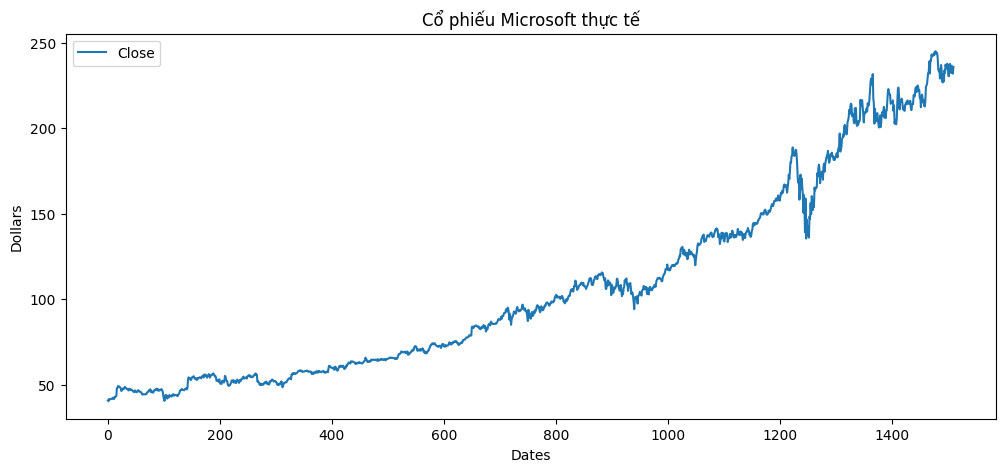

In [18]:
df = data[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

title ='Cổ phiếu Microsoft thực tế'
ylabel='Dollars'
xlabel='Dates'
df.plot(figsize=(12,5),title=title,xlabel=xlabel, ylabel=ylabel)

In [19]:
# 2. chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

<h1>XÂY DỰNG MÔ HÌNH ARIMA</h1>
<h3>Dựa vào chỉ số AIC</h3>
Chỉ số AIC càng thấp thì mô hình càng phù hợp

In [20]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [22]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [23]:
# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [25]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[152.47966522 152.5582615  152.63685778 152.71545407 152.79405035
 152.87264664 152.95124292 153.02983921 153.10843549 153.18703178
 153.26562806 153.34422435 153.42282063 153.50141691 153.5800132
 153.65860948 153.73720577 153.81580205 153.89439834 153.97299462
 154.05159091 154.13018719 154.20878348 154.28737976 154.36597605
 154.44457233 154.52316861 154.6017649  154.68036118 154.75895747]


In [26]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 75.40326934045855
Testing RMSE: 39.16228807477612


In [27]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 75.40326934045855
Testing RMSE: 39.16228807477612


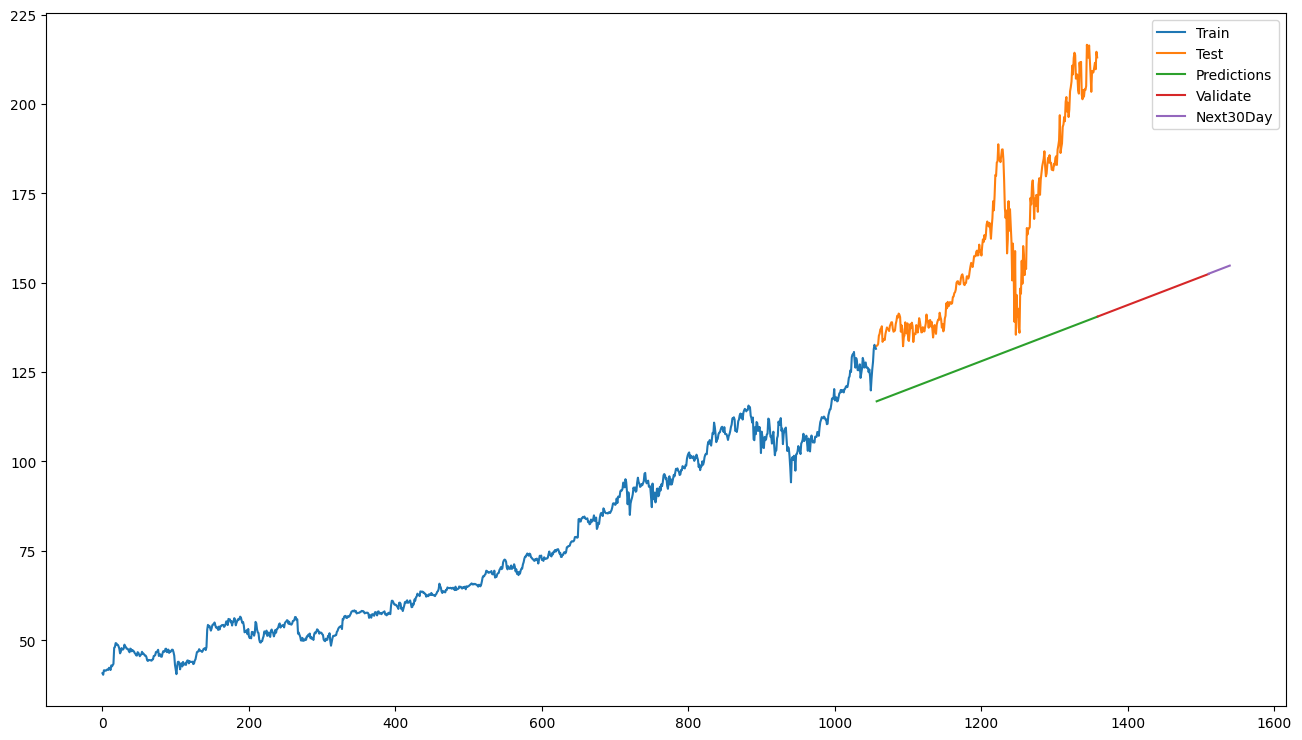

In [28]:
# 9.Vẽ hình
plt.figure(figsize=(16,9))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [29]:
test_data.index

RangeIndex(start=1057, stop=1359, step=1)